In [98]:
using ITensors, ITensorMPS, Optim, LinearAlgebra, Printf, Random, Plots, DelimitedFiles
Random.seed!(123)
include("src/QuantumResource1D.jl")
include("src/HL_module.jl")

all_params_mat = readdlm("DATA/all_params_mat.txt") 
g_vals = vec(readdlm("DATA/g_values.txt"));

In [99]:
N = 25
X_exp, O_exp, ZZ_exp = [], [], []

for ind_g in 1:length(g_vals)
    println("Current value: g = $(g_vals[ind_g])")
    θ_g = all_params_mat[:, ind_g]

    qr_g = QR1D.QuantumResource1D(N)
    psi_g = QR1D.apply_ladder_circuit(qr_g, θ_g)

    X_expval, O_expval, ZZ_term_ev = QR1D.aux_exp_vals(psi_g, qr_g.ZZ_term)
    
    push!(X_exp, X_expval)
    push!(O_exp, O_expval)
    push!(ZZ_exp, ZZ_term_ev)
end

Current value: g = -1.0
Current value: g = -0.9797979797979798
Current value: g = -0.9595959595959596
Current value: g = -0.9393939393939394
Current value: g = -0.9191919191919192
Current value: g = -0.898989898989899
Current value: g = -0.8787878787878788
Current value: g = -0.8585858585858586
Current value: g = -0.8383838383838383
Current value: g = -0.8181818181818182
Current value: g = -0.797979797979798
Current value: g = -0.7777777777777778
Current value: g = -0.7575757575757576
Current value: g = -0.7373737373737373
Current value: g = -0.7171717171717171
Current value: g = -0.696969696969697
Current value: g = -0.6767676767676768
Current value: g = -0.6565656565656566
Current value: g = -0.6363636363636364
Current value: g = -0.6161616161616161
Current value: g = -0.5959595959595959
Current value: g = -0.5757575757575758
Current value: g = -0.5555555555555556
Current value: g = -0.5353535353535354
Current value: g = -0.5151515151515151
Current value: g = -0.494949494949495
Curre

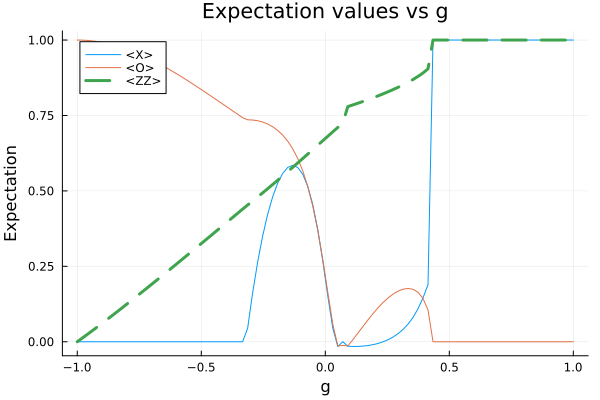

In [100]:
p = plot(g_vals, X_exp, label="<X>", title="Expectation values vs g", xlabel="g", ylabel="Expectation",linewidth=1);
plot!(p, g_vals, O_exp, label="<O>",linewidth=1);
plot!(p, g_vals, ZZ_exp / (N - 1), label="<ZZ>",linestyle=:dash,linewidth=3);

display(p)